In [160]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import nltk
from nltk.corpus import stopwords, webtext, state_union
from nltk.tokenize import word_tokenize
import random
import matplotlib.pyplot as plt

In [302]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [158]:
nltk.download('state_union')

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


True

In [305]:
# Flatten the list of sentences into a single string for each sentence
webtext_sentences = [' '.join(sentence) for sentence in webtext.sents()]
state_union_sentences = [' '.join(sentence) for sentence in state_union.sents()]

# Combine all sentences to form one large corpus
all_sentences = ' '.join(webtext_sentences) + ' ' + ' '.join(state_union_sentences)


In [307]:
all_sentences[:100]

'Cookie Manager : " Don \' t allow sites that set removed cookies to set future cookies " should stay '

In [308]:
all_sentences[-100:]

'ithful to its cause , and confident of the victories to come . May God bless America . ( Applause .)'

In [312]:
from collections import Counter

# Lowercase and tokenize the text
text = all_sentences.lower()
words = word_tokenize(text)

# Remove punctuation
words = [word for word in words if word.isalpha()]

# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Set a minimum frequency threshold
min_freq = 250

filtered_words = [word for word in words if word_counts[word] >= min_freq]


In [313]:
len(filtered_words)

118529

In [314]:
def get_unique_words(words):
    print("Total words in the text: ", len(words))

    unique_words = sorted(set(words))
    print("Unqiue words in the text: ", len(unique_words))

    return unique_words

In [315]:
unique_words = get_unique_words(filtered_words)

# of words in the text:  118529
# of unqiue words in the text:  225


In [219]:
unique_words

['act',
 'add',
 'address',
 'already',
 'also',
 'always',
 'america',
 'american',
 'americans',
 'another',
 'applause',
 'arthur',
 'ask',
 'back',
 'bar',
 'believe',
 'best',
 'better',
 'billion',
 'bit',
 'black',
 'bookmark',
 'bookmarks',
 'boy',
 'browser',
 'budget',
 'build',
 'button',
 'care',
 'cause',
 'cell',
 'change',
 'chick',
 'children',
 'citizens',
 'click',
 'clicking',
 'come',
 'congress',
 'continue',
 'could',
 'country',
 'crash',
 'crashes',
 'cut',
 'day',
 'default',
 'defense',
 'dialog',
 'dollars',
 'download',
 'drunk',
 'dude',
 'economic',
 'economy',
 'end',
 'error',
 'even',
 'ever',
 'every',
 'federal',
 'file',
 'find',
 'firebird',
 'firefox',
 'first',
 'forces',
 'forward',
 'free',
 'freedom',
 'fruit',
 'fuck',
 'fucking',
 'full',
 'future',
 'get',
 'girl',
 'give',
 'go',
 'god',
 'going',
 'good',
 'got',
 'government',
 'great',
 'growth',
 'guy',
 'health',
 'help',
 'high',
 'history',
 'hobo',
 'home',
 'hope',
 'increase',
 'j

In [316]:
def generate_cbows(words, window_size):
    cbows = []
    for i, target_word in enumerate(words):
        context_words = words[max(0, i - window_size):i] + words[i + 1:i + window_size + 1]
        if len(context_words) == window_size * 2:
            cbows.append((context_words, target_word))
    return cbows

In [318]:
cbows = generate_cbows(filtered_words, window_size=3)

for context_words, target_word in cbows[:3]:
    print(f'Context Words: {context_words}, Target Word: {target_word}')

for context_words, target_word in cbows[-3:]:
    print(f'Context Words: {context_words}, Target Word: {target_word}')

Context Words: ['manager', 'set', 'set', 'full', 'open', 'new'], Target Word: future
Context Words: ['set', 'set', 'future', 'open', 'new', 'browser'], Target Word: full
Context Words: ['set', 'future', 'full', 'new', 'browser', 'download'], Target Word: open
Context Words: ['economy', 'forward', 'country', 'come', 'may', 'god'], Target Word: cause
Context Words: ['forward', 'country', 'cause', 'may', 'god', 'america'], Target Word: come
Context Words: ['country', 'cause', 'come', 'god', 'america', 'applause'], Target Word: may


In [175]:
def one_hot_encoding(word, unique_words):
    encoding = [1 if word == w else 0 for w in unique_words]
    return torch.tensor(encoding, dtype=torch.float32)

In [226]:
one_hot_encodings = {word: one_hot_encoding(word, unique_words) for word in unique_words}
one_hot_encodings['country']

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [319]:
cbow_vector_pairs = [([one_hot_encodings[word] for word in context_words], one_hot_encodings[target_word]) for context_words, target_word in cbows]
cbow_vector_pairs = [(torch.sum(torch.stack(context_vectors), dim=0), target_vector) for context_vectors, target_vector in cbow_vector_pairs]

In [320]:
class MyDataset(Dataset):
    def __init__(self, dataset):
        self.features = [entry[0] for entry in dataset]
        self.targets = [entry[1] for entry in dataset]

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        feature_item = self.features[index]
        target_item = self.targets[index]
        return feature_item, target_item

In [321]:
cbow_vector_pairs = random.sample(cbow_vector_pairs, len(cbow_vector_pairs))

split_index = int(len(cbow_vector_pairs) * 0.90)

train_dataset = MyDataset(cbow_vector_pairs[:split_index])
test_dataset = MyDataset(cbow_vector_pairs[split_index:])

batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [322]:
class SimpleWord2Vec(nn.Module):

    def __init__(self, VOCAB_SIZE, VECTOR_DIM) -> None:
        super().__init__()

        self.vocab_size = VOCAB_SIZE
        self.vector_dim = VECTOR_DIM
        self.W1 = nn.Parameter(data=torch.randn(self.vocab_size, self.vector_dim), requires_grad=True)
        self.W2 = nn.Parameter(data=torch.randn(self.vector_dim, self.vocab_size), requires_grad=True)

    def forward(self, X) -> torch.tensor:
        X = X @ self.W1
        X = X @ self.W2

        return X

In [323]:
VOCAB_SIZE = len(unique_words)
VECTOR_DIM = 2
VOCAB_SIZE

225

In [324]:
model = SimpleWord2Vec(VOCAB_SIZE, VECTOR_DIM)

In [325]:
def train_model(model, train_dataloader, validation_dataloader, epochs, learning_rate, verbose=False):

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

    train_set_loss_log = []
    validation_set_loss_log = []

    for epoch in range(epochs):
        if verbose: print("Epoch: ", epoch)
        model.train()
        total_train_loss = 0.0
        num_train_batches = 0

        for inputs_batch, outputs_batch in train_dataloader:

            y_train_logits = model(inputs_batch)
            train_loss = loss_fn(y_train_logits, outputs_batch)

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            total_train_loss += train_loss.item()
            num_train_batches += 1

        average_train_loss = total_train_loss / num_train_batches
        train_set_loss_log.append(average_train_loss)

        model.eval()
        total_validation_loss = 0.0
        num_validation_batches = 0

        with torch.inference_mode():
            for inputs_batch, outputs_batch in validation_dataloader:
                y_val_logits = model(inputs_batch)
                validation_loss = loss_fn(y_val_logits, outputs_batch)

                total_validation_loss += validation_loss.item()
                num_validation_batches += 1

        average_validation_loss = total_validation_loss / num_validation_batches
        validation_set_loss_log.append(average_validation_loss)

        if verbose: print("Train Loss: ", average_train_loss, "##", "Validation Loss: ", average_validation_loss)


    return model, train_set_loss_log, validation_set_loss_log

In [326]:
model, train_set_loss_log, validation_set_loss_log = train_model(model, train_dataloader, validation_dataloader,
                                                                 epochs=5, learning_rate=0.01, verbose=True)

Epoch:  0
Train Loss:  5.265070517619499 ## Validation Loss:  4.748788397799256
Epoch:  1
Train Loss:  4.739682165247706 ## Validation Loss:  4.740656345121322
Epoch:  2
Train Loss:  4.738374014135314 ## Validation Loss:  4.746567664607879
Epoch:  3
Train Loss:  4.736985797573151 ## Validation Loss:  4.747953273916758
Epoch:  4
Train Loss:  4.737721020973723 ## Validation Loss:  4.749631286949239


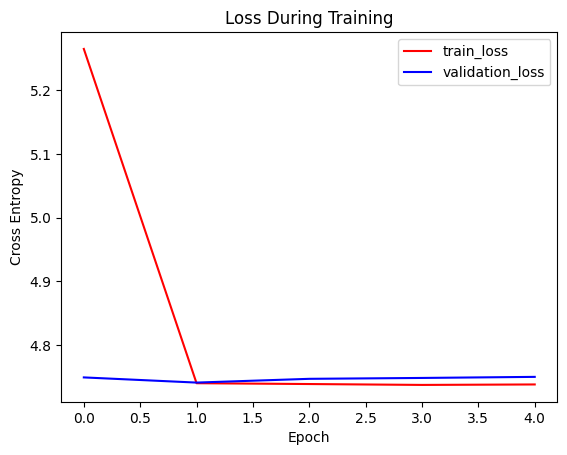

In [327]:
plt.plot(train_set_loss_log, color='red', label='train_loss')
plt.plot(validation_set_loss_log, color='blue', label='validation_loss')

plt.title("Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy")
plt.legend()
plt.show()

In [328]:
# Word Vectors
params = list(model.parameters())
word_vectors = params[0].detach()

# Create a dictionary with the same order mapping
word_dict = {word: vector for word, vector in zip(unique_words, word_vectors)}
word_dict

{'act': tensor([0.4857, 0.0452]),
 'add': tensor([-0.0976, -0.3556]),
 'address': tensor([ 0.1510, -0.4758]),
 'already': tensor([-0.0120, -0.0706]),
 'also': tensor([0.4102, 0.0392]),
 'always': tensor([-0.1030,  0.0249]),
 'america': tensor([0.6299, 0.4599]),
 'american': tensor([0.7799, 0.4452]),
 'americans': tensor([0.6029, 0.2023]),
 'another': tensor([0.1338, 0.0720]),
 'applause': tensor([0.6846, 0.2470]),
 'arthur': tensor([-0.4052,  0.1255]),
 'ask': tensor([0.2964, 0.2765]),
 'back': tensor([-0.1579, -0.0124]),
 'bar': tensor([ 0.1007, -0.3226]),
 'believe': tensor([0.1771, 0.4039]),
 'best': tensor([0.1561, 0.3151]),
 'better': tensor([0.2333, 0.2153]),
 'billion': tensor([ 0.9885, -0.5771]),
 'bit': tensor([-0.4108,  0.0995]),
 'black': tensor([-0.3421,  0.4316]),
 'bookmark': tensor([-0.1564, -0.3131]),
 'bookmarks': tensor([-0.1494, -0.2641]),
 'boy': tensor([-0.4109,  0.3112]),
 'browser': tensor([ 0.1525, -0.6134]),
 'budget': tensor([ 0.9964, -0.3212]),
 'build': tens

In [329]:
def cosine_similarity(v1, v2):
    return (v1 @ v2) / (torch.norm(v1) * torch.norm(v2))

def most_similar(word, word_dict, top_k=5):
    if word not in word_dict:
        raise ValueError(f"{word} not found in the word dictionary.")

    query_vector = word_dict[word]

    # Calculate cosine similarity with all other words in the dictionary
    similarities = {}
    for other_word, other_vector in word_dict.items():
        if other_word != word:
            similarity = cosine_similarity(query_vector, other_vector)
            similarities[other_word] = similarity

    # Sort the words by similarity in descending order
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

    # Get the top-k most similar words
    top_similar_words = sorted_similarities[:top_k]

    return top_similar_words

In [330]:
most_similar('president', word_dict)

[('social', tensor(1.0000)),
 ('economy', tensor(1.0000)),
 ('forces', tensor(0.9999)),
 ('years', tensor(0.9998)),
 ('also', tensor(0.9998))]

In [332]:
cosine_similarity(word_dict['browser'], word_dict['tab'])

tensor(0.9998)

In [240]:
cosine_similarity(word_dict['president'], word_dict['america'])

tensor(0.9246)

In [333]:
cosine_similarity(word_dict['president'], word_dict['download'])

tensor(0.1297)

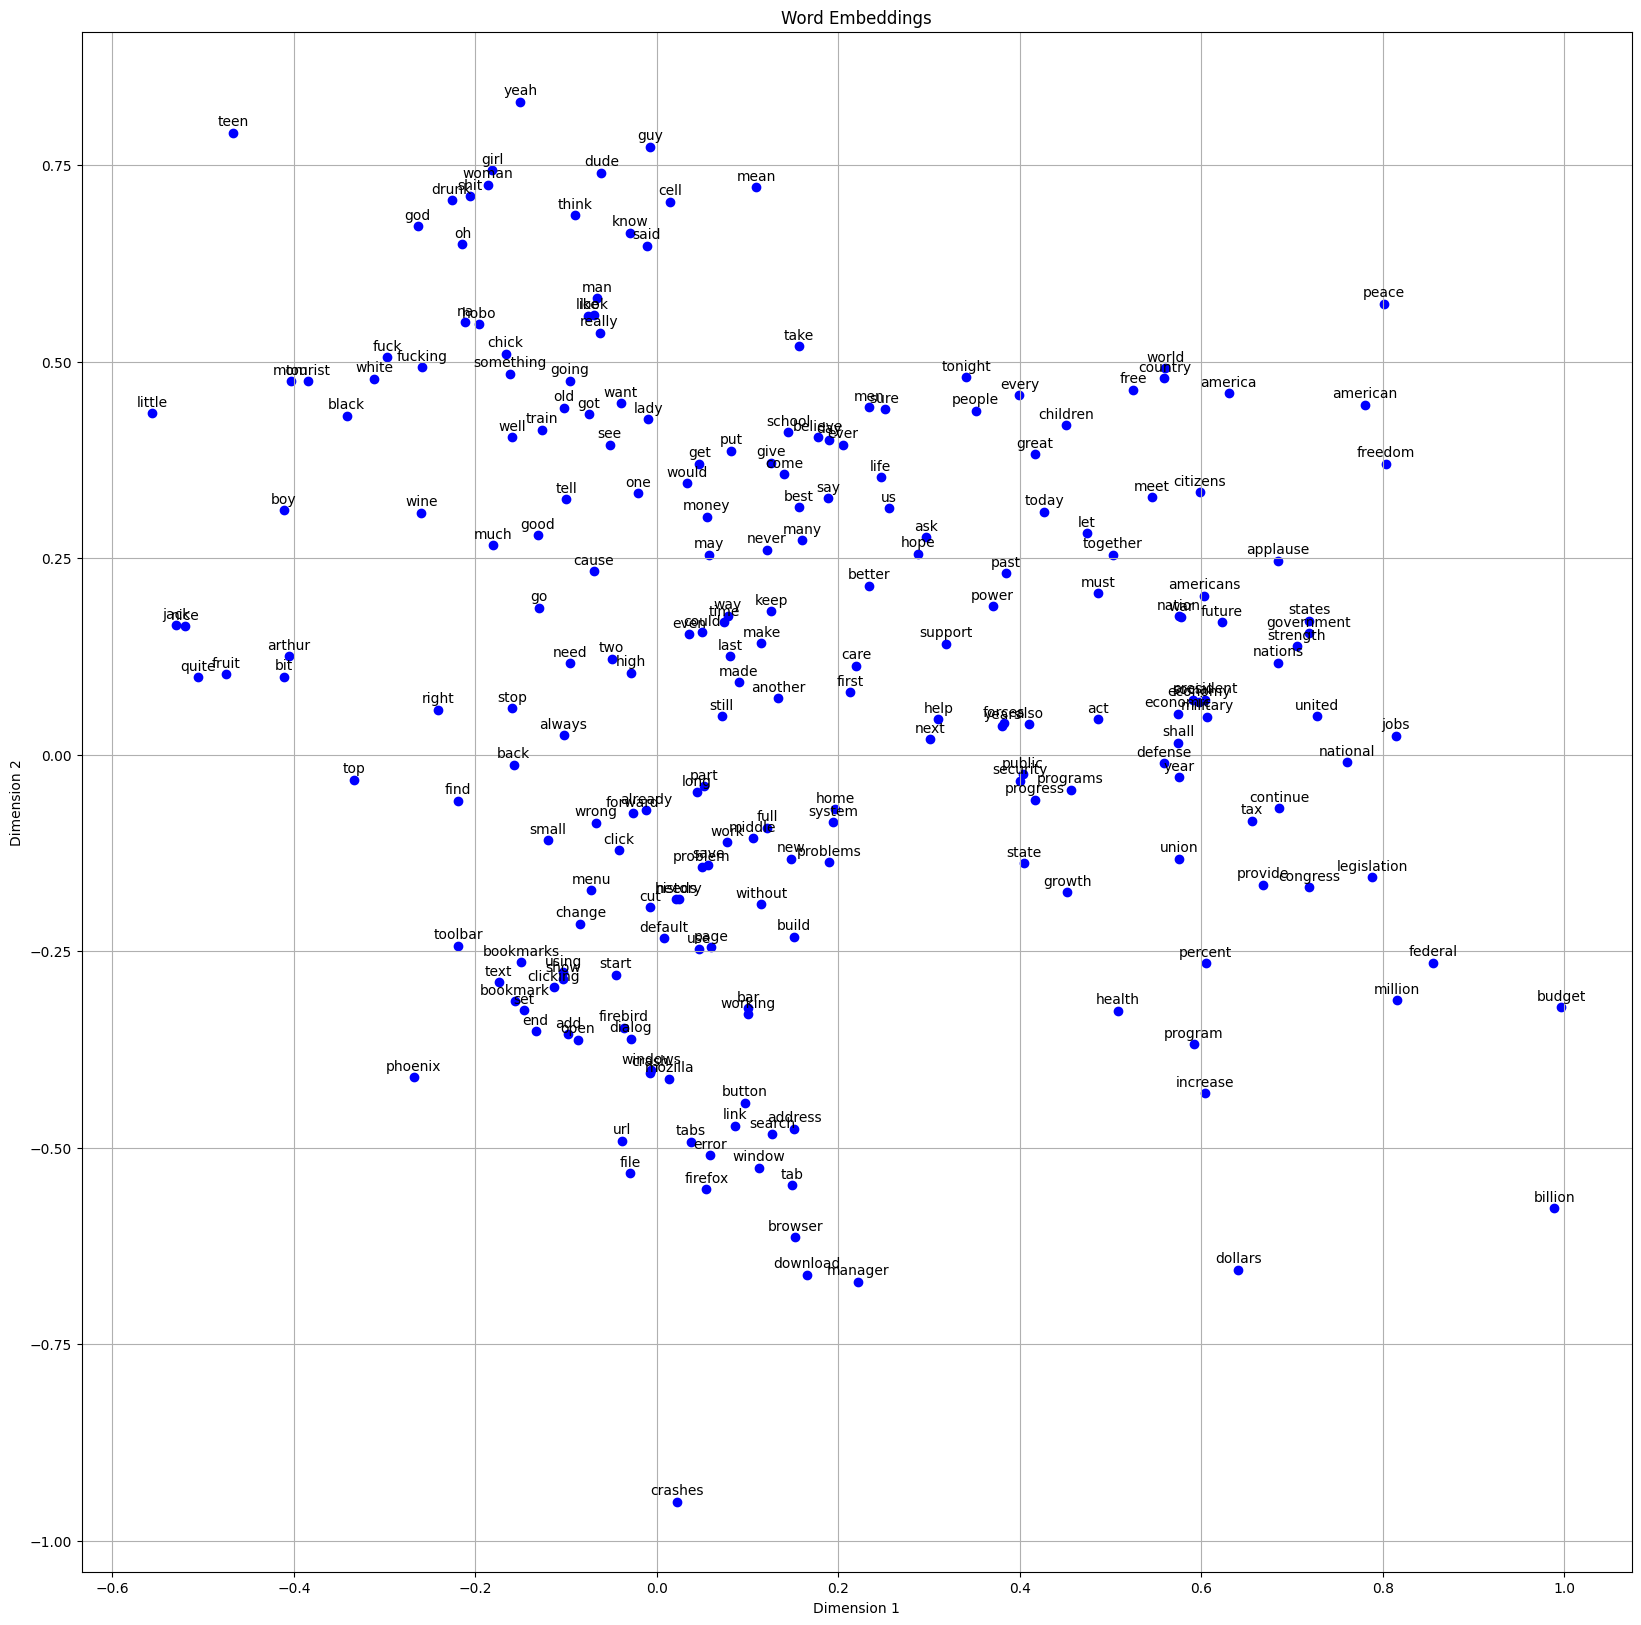

In [334]:
x_coords, y_coords = zip(*[word_dict[word].numpy() for word in list(word_dict.keys())])

plt.figure(figsize=(20, 20))
plt.scatter(x_coords, y_coords, marker='o', color='blue')

for i, word in enumerate(list(word_dict.keys())):
    plt.annotate(word, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

In [294]:
from collections import Counter


webtext_word_freq_lower = Counter(word.lower() for word in webtext.words())
webtext_word_freq_capitalized = Counter(word for word in webtext.words() if word.istitle())

state_union_word_freq_lower = Counter(word.lower() for word in state_union.words())
state_union_word_freq_capitalized = Counter(word for word in state_union.words() if word.istitle())

word_vectors = []
labels = []

for word in unique_words:
    vector = word_dict[word]
    word_vectors.append(vector)

    webtext_freq_lower = webtext_word_freq_lower.get(word.lower(), 0)
    webtext_freq_capitalized = webtext_word_freq_capitalized.get(word, 0)
    state_union_freq_lower = state_union_word_freq_lower.get(word.lower(), 0)
    state_union_freq_capitalized = state_union_word_freq_capitalized.get(word, 0)

    webtext_total_freq = webtext_freq_lower + webtext_freq_capitalized
    state_union_total_freq = state_union_freq_lower + state_union_freq_capitalized

    if webtext_total_freq > state_union_total_freq:
        labels.append(0)  # WebText
    elif state_union_total_freq > webtext_total_freq:
        labels.append(1)  # State of the Union
    else:
        labels.append(2)  # Equal frequency


In [296]:
print(unique_words[:10])
print(word_vectors[:10])
print(labels[:10])

['act', 'add', 'address', 'already', 'also', 'always', 'america', 'american', 'americans', 'another']
[tensor([0.6314, 0.0282]), tensor([-0.0837,  0.1903]), tensor([-0.1092,  0.4517]), tensor([ 0.1280, -0.0001]), tensor([0.3248, 0.1724]), tensor([-0.0690, -0.0410]), tensor([ 0.6831, -0.0347]), tensor([0.8700, 0.0397]), tensor([0.6909, 0.0141]), tensor([-0.1069, -0.1170])]
[1, 0, 0, 1, 1, 0, 1, 1, 1, 1]


In [293]:
len(unique_words)

225

In [295]:
labels.count(2) # all words are split between 2 groups

0

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(word_vectors, labels, test_size=0.2)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification accuracy: {accuracy}")

Classification accuracy: 0.8666666666666667
